# Inequality Data Analysis

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import plotly.plotly as py
import cufflinks as cf
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr, spearmanr
%matplotlib inline

cf.set_config_file(theme='space',offline=True)
pd.set_option('display.max_colwidth', -1)

## Data Importing

In [2]:
df = pd.read_csv("../data/production/subject/Inequality.csv").set_index(["Country Code","Year"])
dd = pd.read_csv("../data/production/data_dictionary.csv").set_index("Code").loc[df.columns]
tourism_columns = ['ST.INT.ARVL', 'ST.INT.XPND.MP.ZS', 'ST.INT.XPND.CD', 'ST.INT.DPRT',
       'ST.INT.RCPT.XP.ZS', 'ST.INT.RCPT.CD', 'Tourist Defecit', 'Tourism Net',
       'Tourist Avg Net', 'Population Estimate', 'ST.INT.ARVL.PER.CAPITA',
       'ST.INT.DPRT.PER.CAPITA']
df.drop(["population","gdp_ppp_pc_usd2011","id","quality_score"],axis="columns",inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



In [3]:
dd

,Indicator Name
Code,
ST.INT.ARVL,"International tourism, number of arrivals"
ST.INT.XPND.MP.ZS,"International tourism, expenditures (% of total imports)"
ST.INT.XPND.CD,"International tourism, expenditures (current US$)"
ST.INT.DPRT,"International tourism, number of departures"
ST.INT.RCPT.XP.ZS,"International tourism, receipts (% of total exports)"
ST.INT.RCPT.CD,"International tourism, receipts (current US$)"
Tourist Defecit,The difference in outbound-inbound tourists for a country
Tourism Net,The difference in tourism recepts-expenditures
Tourist Avg Net,The average net income per tourist


## Correlations

In [4]:
corr = df.corr().drop(tourism_columns,axis="columns").loc[tourism_columns]

In [5]:
corr.iplot(kind='heatmap',colorscale='-rdbu',
                                filename='economic-heatmap',
          title="Correlations between Tourism indicators and economic",
          zerolinecolor="white",
          dimensions=(640,500),margin=(150,150,150,50))

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Variable Distributions

In [6]:
def draw_histograms(dataframe):
    ax = dataframe.iplot(kind='histogram', subplots=True, shape=(9,4))
    return ax

draw_histograms(df)

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### Normalize

In [7]:
df_norm = (df - df.mean()) / (df.max() - df.min())
draw_histograms(df_norm)

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Analysis

### Inequality Correlation with Tourism Variables



#### A Bigger market share for tourism results in higher equality
$H_0: \rho = 0$
>There is not a significant linear relationship between x and y

$H_a: \rho \neq 0$
>There is a significant linear relationship between x and y

$\alpha = 0.01$

In [8]:
x = df_norm['ST.INT.RCPT.XP.ZS']
y = df_norm['SI.POV.GINI']
c = spearmanr(x,y)
print("The two variables have a spearman correlation of {} with a pvalue of {}.".format(c.correlation,c.pvalue))

The two variables have a spearman correlation of 0.007586460697844305 with a pvalue of 0.6066161826004317.


$\rho \equiv 0$ at $\alpha = .01$

We fail to reject the null hypothesis

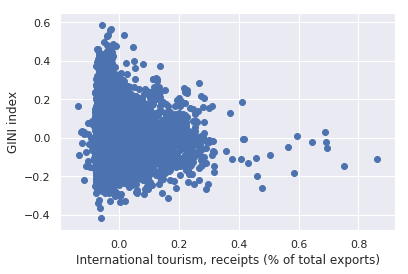

In [9]:
plt.scatter(x,y)
plt.xlabel("International tourism, receipts (% of total exports)")
plt.ylabel("GINI index");



#### A Bigger market share for tourism results in higher equality (round 2)
$H_0: \rho = 0$
>There is not a significant linear relationship between x and y

$H_a: \rho \neq 0$
>There is a significant linear relationship between x and y

$\alpha = 0.01$

In [10]:
x = df_norm['ST.INT.RCPT.XP.ZS']
y = df_norm['SI.DST.FRST.10']
c = spearmanr(x,y)
print("The two variables have a spearman correlation of {} with a pvalue of {}.".format(c.correlation,c.pvalue))

The two variables have a spearman correlation of 0.05641561711062179 with a pvalue of 0.00012708108793161872.


$\rho = 0$ at $\alpha = .01$

The null hypothesis is rejected, and the variables are slightly correlated.

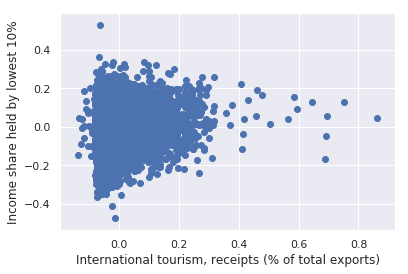

In [11]:
plt.scatter(x,y)
plt.xlabel("International tourism, receipts (% of total exports)")
plt.ylabel("Income share held by lowest 10%");



#### A Bigger market share for tourism results in lower equality
$H_0: \rho = 0$
>There is not a significant linear relationship between x and y

$H_a: \rho \neq 0$
>There is a significant linear relationship between x and y

$\alpha = 0.01$

In [12]:
x = df_norm['ST.INT.RCPT.XP.ZS']
y = df_norm['SI.DST.10TH.10']
c = spearmanr(x,y)
print("The two variables have a spearman correlation of {} with a pvalue of {}.".format(c.correlation,c.pvalue))

The two variables have a spearman correlation of 0.04620014371945418 with a pvalue of 0.0017049151198087406.


$\rho = 0$ at $\alpha = .01$

The null hypothesis is rejected, and the variables are slightly correlated.

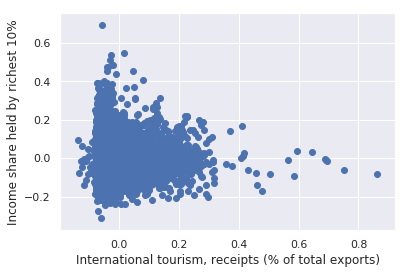

In [13]:
plt.scatter(x,y)
plt.xlabel("International tourism, receipts (% of total exports)")
plt.ylabel("Income share held by richest 10%");